# Importing package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set seaborn style for better visuals
sns.set(style="whitegrid")

# Read Dataframe

## Apple Tweets

In [ ]:
import os

# Define the folder path
folder_path = '../data/raw/apple/2025-04-09'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        temp_df = pd.read_csv(file_path)
        
        # Add the is_main_tweet column
        temp_df['is_main_tweet'] = [True] + [False] * (len(temp_df) - 1)
        
        # Append the dataframe to the list
        dataframes.append(temp_df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

In [22]:
combined_df[(combined_df['is_main_tweet']==False)]

,username,date,text,replies,reposts,likes,bookmarks,views,is_main_tweet
1,Mr_Davvi,2025-03-02T07:39:27.000Z,Clean,0,0,2,0,98,False
2,Enzo496105,2025-03-02T10:05:31.000Z,True,0,0,2,0,584,False
3,cryptotonyfred,2025-03-01T21:55:24.000Z,It’s looking dope,0,0,0,0,155,False
4,TylerMercadoX,2025-03-01T21:56:36.000Z,Looks amazing!,0,0,0,0,162,False
5,moonchildti,2025-03-01T21:59:30.000Z,I think the camera is too weak for that price....,0,0,0,0,362,False
...,...,...,...,...,...,...,...,...,...
8553,Jerry_bade,2025-04-08T19:48:38.000Z,How many billions to build facilities? How muc...,0,0,0,0,46,False
8554,c_o_z_y_k_i_n_g,2025-04-08T19:56:48.000Z,As long as that mean decent paying jobs fir Am...,0,0,0,0,32,False
8555,UnitedFann1,2025-04-08T20:11:01.000Z,Taking profits from US markets so why not,0,0,0,0,30,False
8556,Shakira61339732,2025-04-09T09:24:09.000Z,Sure that would be $3000 + for a baseline mode...,0,0,0,0,24,False


In [25]:
combined_df = combined_df.drop_duplicates()

In [31]:
combined_df.shape

(4376, 9)

In [24]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [33]:
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return text
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing to the 'text' column
combined_df['text'] = combined_df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\perso\AppData\Local\Temp\ipykernel_44856\2731222873.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(preprocess_text)


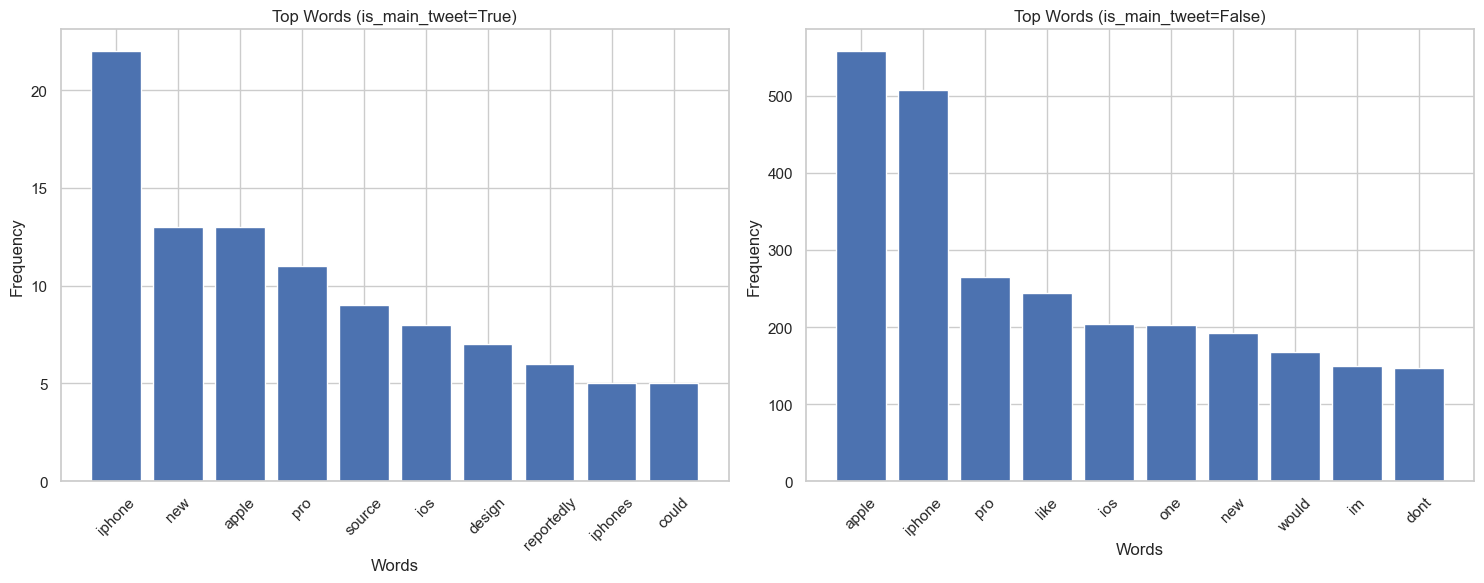

In [42]:
from collections import Counter
from wordcloud import WordCloud

# Filter the data for is_main_tweet True and False
main_tweet_text = " ".join(combined_df[combined_df['is_main_tweet'] == True]['text'].dropna())
non_main_tweet_text = " ".join(combined_df[combined_df['is_main_tweet'] == False]['text'].dropna())

# Function to get top words
def get_top_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Get top words for both cases
top_words_main = get_top_words(main_tweet_text)
top_words_non_main = get_top_words(non_main_tweet_text)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for is_main_tweet True
axes[0].bar(*zip(*top_words_main))
axes[0].set_title("Top Words (is_main_tweet=True)")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("Words")
axes[0].tick_params(axis='x', rotation=45)

# Plot for is_main_tweet False
axes[1].bar(*zip(*top_words_non_main))
axes[1].set_title("Top Words (is_main_tweet=False)")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Words")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

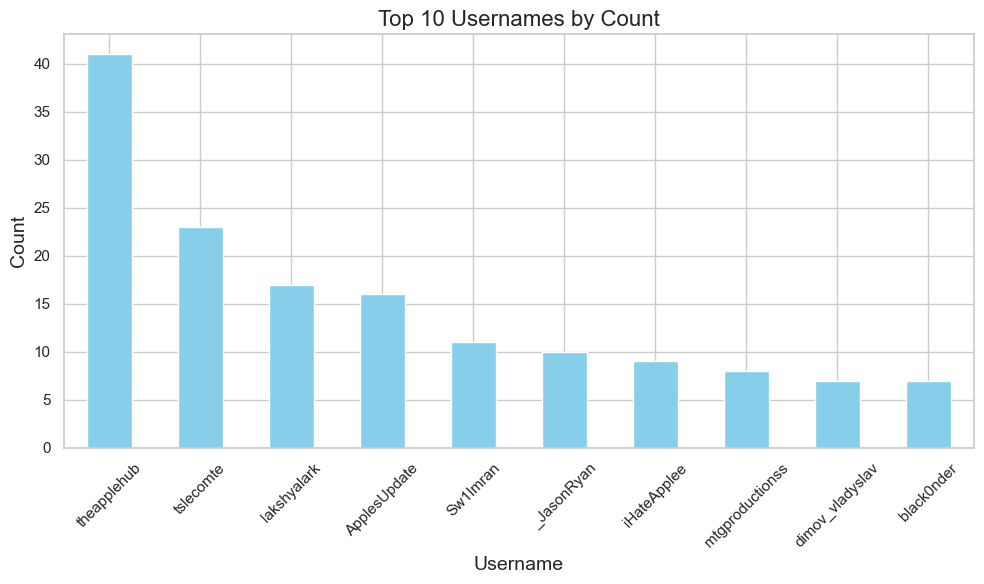

In [57]:
# Get the top 10 most frequent usernames
top_usernames = combined_df['username'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_usernames.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usernames by Count', fontsize=16)
plt.xlabel('Username', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Samsung Dataset

In [ ]:
import os

# Define the folder path
folder_path = '../data/raw/samsung/2025-04-09'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        try :
            # Read the CSV file
            temp_df = pd.read_csv(file_path)
        except:
            print(f"Error reading {file_path}. Skipping this file.")
            continue
        # Read the CSV file
        temp_df = pd.read_csv(file_path)
        
        # Add the is_main_tweet column
        temp_df['is_main_tweet'] = [True] + [False] * (len(temp_df) - 1)
        
        # Append the dataframe to the list
        dataframes.append(temp_df)

# Concatenate all dataframes into one
combined_df2 = pd.concat(dataframes, ignore_index=True)

Error reading ../scraping/data_scraped/samsung/2025-04-09\1885249875417456942.csv. Skipping this file.
Error reading ../scraping/data_scraped/samsung/2025-04-09\1888887741049655780.csv. Skipping this file.
Error reading ../scraping/data_scraped/samsung/2025-04-09\1892758612700754383.csv. Skipping this file.
Error reading ../scraping/data_scraped/samsung/2025-04-09\1894284344283599133.csv. Skipping this file.


In [46]:
combined_df2 = combined_df2.drop_duplicates()
combined_df2[combined_df2['is_main_tweet']==True]

,username,date,text,replies,reposts,likes,bookmarks,views,is_main_tweet
0,Juanm06221,2025-02-07T01:24:06.000Z,a S25 made of cheap plastic and weak glass and...,0,0,0,0,21,True
21,monocorporation,2025-02-13T11:13:35.000Z,that's all Quantum-Safe in the future we do,0,0,0,0,18,True
45,Taloooly_,2025-02-16T10:40:07.000Z,WHERE IS THE ONE UI 7 UPDATE FFS?!?!?!\n\nWHY ...,0,0,10,0,306,True
107,alibaba11167,2025-03-04T17:24:54.000Z,Please start doings the samsung flagship phone...,0,0,0,0,20,True
134,SamsungMobile,2025-02-28T04:00:01.000Z,#GalaxyBuds3 Series offers enhanced convenienc...,32,28,269,11,35685,True
185,SamsungMobile,2025-03-02T05:00:02.000Z,Samsung marks a step forward with AI for every...,97,61,482,20,50063,True
265,SamsungMobile,2025-03-06T04:00:16.000Z,World Sleep Day: Recovering from daylight savi...,34,20,174,8,36842,True
276,SamsungMobile,2025-03-13T13:30:30.000Z,"Vanessa Hill, a sleep scientist, explores how ...",29,13,184,12,35346,True
336,althaqafiii901,2025-03-27T18:21:39.000Z,"Dear Samsung fans, I'm one of you. I've loved ...",0,0,0,0,88,True
390,SamsungMobile,2025-04-02T12:13:07.000Z,Samsung announced the new #GalaxyTabS10 FE and...,31,32,275,6,35941,True


In [47]:
# Apply preprocessing to the 'text' column
combined_df2['text'] = combined_df2['text'].apply(preprocess_text)

C:\Users\perso\AppData\Local\Temp\ipykernel_44856\3223241033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df2['text'] = combined_df2['text'].apply(preprocess_text)


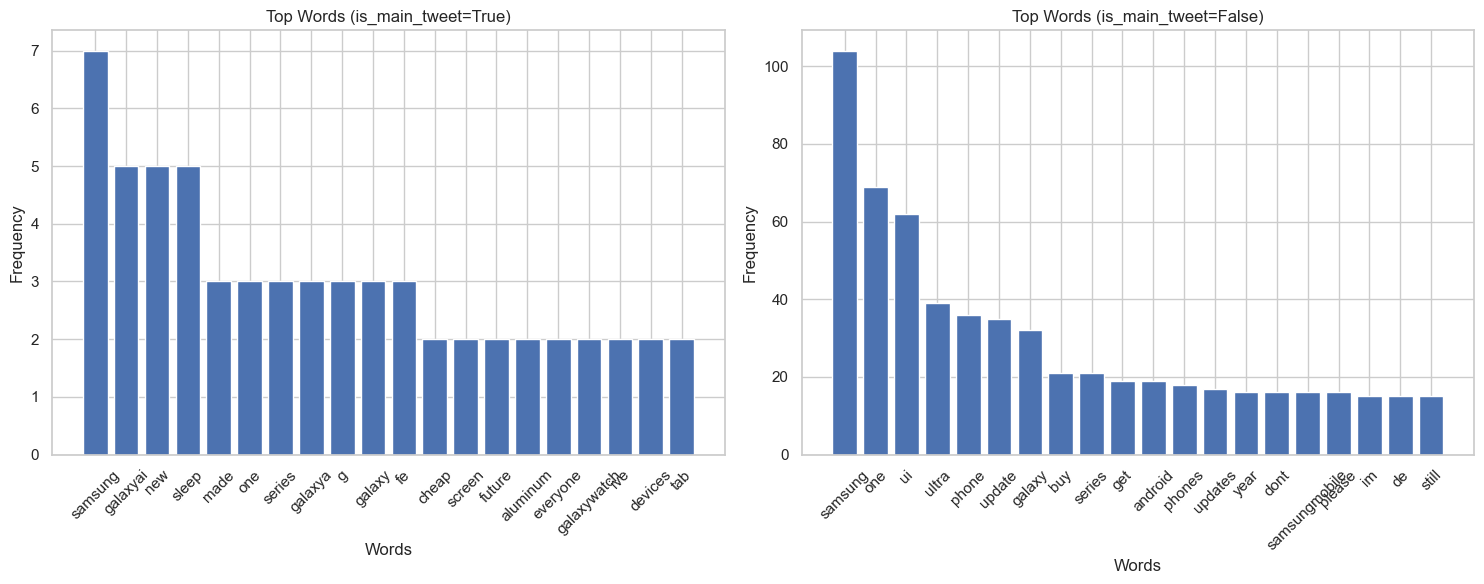

In [50]:
from collections import Counter
from wordcloud import WordCloud

# Filter the data for is_main_tweet True and False
main_tweet_text = " ".join(combined_df2[combined_df2['is_main_tweet'] == True]['text'].dropna())
non_main_tweet_text = " ".join(combined_df2[combined_df2['is_main_tweet'] == False]['text'].dropna())

# Function to get top words
def get_top_words(text, n=20):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Get top words for both cases
top_words_main = get_top_words(main_tweet_text)
top_words_non_main = get_top_words(non_main_tweet_text)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for is_main_tweet True
axes[0].bar(*zip(*top_words_main))
axes[0].set_title("Top Words (is_main_tweet=True)")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("Words")
axes[0].tick_params(axis='x', rotation=45)

# Plot for is_main_tweet False
axes[1].bar(*zip(*top_words_non_main))
axes[1].set_title("Top Words (is_main_tweet=False)")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Words")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

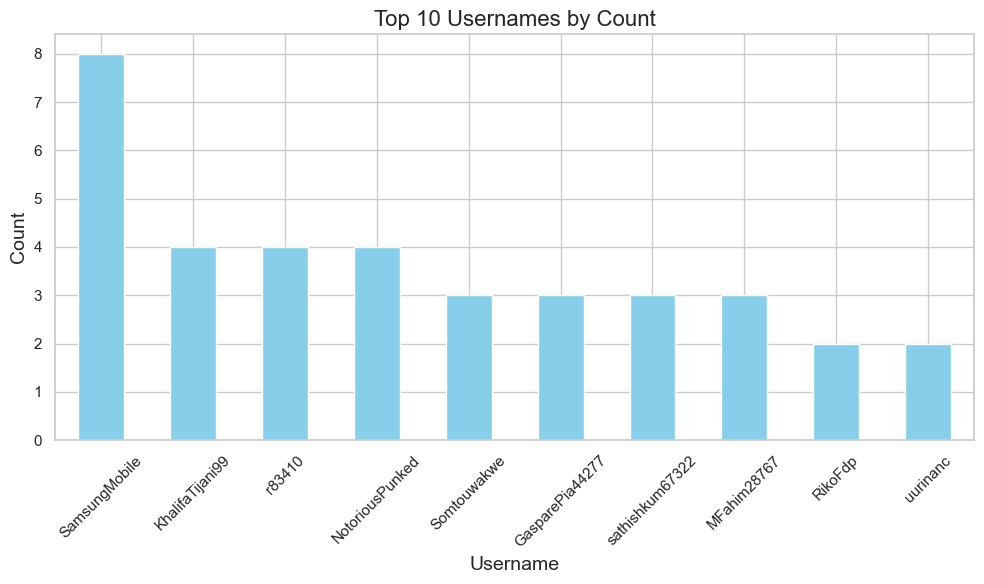

In [59]:
# Get the top 10 most frequent usernames
top_usernames = combined_df2['username'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_usernames.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usernames by Count', fontsize=16)
plt.xlabel('Username', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Nintendo Dataset

In [ ]:
import os

# Define the folder path
folder_path = '../data/raw/nintendo/2025-04-09'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        
        try :
            # Read the CSV file
            temp_df = pd.read_csv(file_path)
        except:
            print(f"Error reading {file_path}. Skipping this file.")
            continue
        # Read the CSV file
        temp_df = pd.read_csv(file_path)
        
        # Add the is_main_tweet column
        temp_df['is_main_tweet'] = [True] + [False] * (len(temp_df) - 1)
        
        # Append the dataframe to the list
        dataframes.append(temp_df)

# Concatenate all dataframes into one
combined_df3 = pd.concat(dataframes, ignore_index=True)

In [52]:
combined_df3

,username,date,text,replies,reposts,likes,bookmarks,views,is_main_tweet
0,NintendoAmerica,2025-04-01T13:00:02.000Z,"Join us tomorrow, April 2nd, at 6 a.m. PT for ...",1428,16309,55003,4141,12866057,True
1,IntroSpecktive,2025-04-01T13:05:13.000Z,An hour???? Boys we are FEASTING,9,34,2415,15,73536,False
2,ConnorEatsPants,2025-04-01T18:23:26.000Z,my life has been so boring without your produc...,9,34,1950,12,45413,False
3,OoCPokemon,2025-04-01T13:16:55.000Z,Will be watching,0,15,1013,35,76232,False
4,Domtendo,2025-04-01T13:03:10.000Z,My Body is ready,10,10,908,6,65324,False
...,...,...,...,...,...,...,...,...,...
5242,M_Fenix629,2025-04-04T11:18:30.000Z,Wow cool .... How much do I have to pay for th...,0,0,0,0,20,False
5243,neilhamshaw,2025-04-04T12:34:30.000Z,Is it right that they’re charging the price fo...,0,0,0,0,66,False
5244,K1983Q,2025-04-04T13:16:16.000Z,Looks the same to me....,0,0,0,0,8,False
5245,antiNAZI6666,2025-04-04T13:18:55.000Z,Looks much better on emulators.,0,0,0,0,6,False


In [53]:
combined_df3 = combined_df3.drop_duplicates()
combined_df3[combined_df3['is_main_tweet']==True]

,username,date,text,replies,reposts,likes,bookmarks,views,is_main_tweet
0,NintendoAmerica,2025-04-01T13:00:02.000Z,"Join us tomorrow, April 2nd, at 6 a.m. PT for ...",1428,16309,55003,4141,12866057,True
252,NintendoAmerica,2025-04-02T13:07:30.000Z,Drive virtually everywhere in Mario Kart World...,825,12257,42713,3977,5398488,True
688,NintendoAmerica,2025-04-02T13:25:34.000Z,"Explore the new system through tech demos, min...",2566,3589,10657,1095,10253523,True
1051,NintendoAmerica,2025-04-02T13:44:00.000Z,Experience the untold story of the Imprisoning...,266,4541,13515,919,810855,True
1330,NintendoAmerica,2025-04-02T13:45:22.000Z,Classic Nintendo GameCube games are coming exc...,1112,8356,31304,1874,2372444,True
1648,NintendoAmerica,2025-04-02T13:54:13.000Z,We’re not done yet! There are even more games ...,146,1572,7086,504,540542,True
1810,NintendoAmerica,2025-04-02T13:58:35.000Z,"The Duskbloods, a brand-new multiplayer game b...",638,9666,34534,2828,3244127,True
2124,NintendoAmerica,2025-04-02T14:01:37.000Z,"Kirby Air Riders, a brand-new title directed b...",637,11187,34667,1978,2390234,True
2509,infernozilla,2025-04-03T13:37:45.000Z,I'm seated.,0,0,0,0,2059,True
2699,STRIMANDO,2025-04-03T15:37:25.000Z,Drop the price,0,0,62,0,2635,True


In [55]:
# Apply preprocessing to the 'text' column
combined_df3['text'] = combined_df3['text'].apply(preprocess_text)

C:\Users\perso\AppData\Local\Temp\ipykernel_44856\2071262974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df3['text'] = combined_df3['text'].apply(preprocess_text)


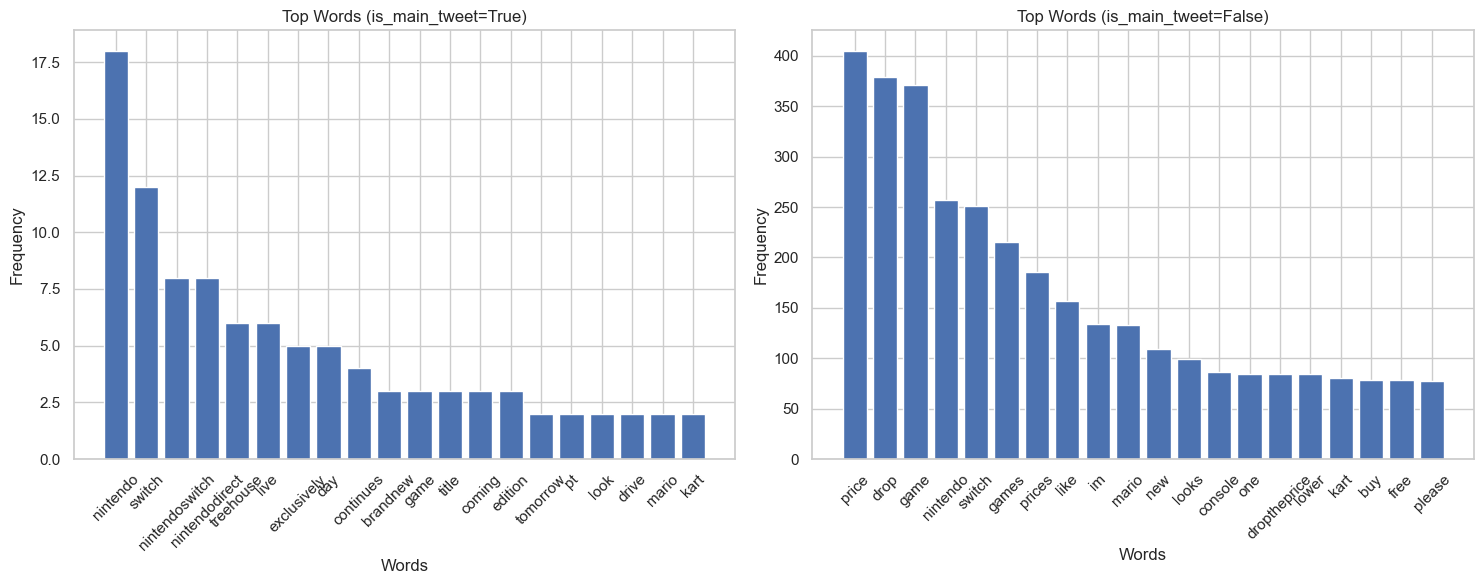

In [56]:
from collections import Counter
from wordcloud import WordCloud

# Filter the data for is_main_tweet True and False
main_tweet_text = " ".join(combined_df3[combined_df3['is_main_tweet'] == True]['text'].dropna())
non_main_tweet_text = " ".join(combined_df3[combined_df3['is_main_tweet'] == False]['text'].dropna())

# Function to get top words
def get_top_words(text, n=20):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Get top words for both cases
top_words_main = get_top_words(main_tweet_text)
top_words_non_main = get_top_words(non_main_tweet_text)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for is_main_tweet True
axes[0].bar(*zip(*top_words_main))
axes[0].set_title("Top Words (is_main_tweet=True)")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("Words")
axes[0].tick_params(axis='x', rotation=45)

# Plot for is_main_tweet False
axes[1].bar(*zip(*top_words_non_main))
axes[1].set_title("Top Words (is_main_tweet=False)")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Words")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

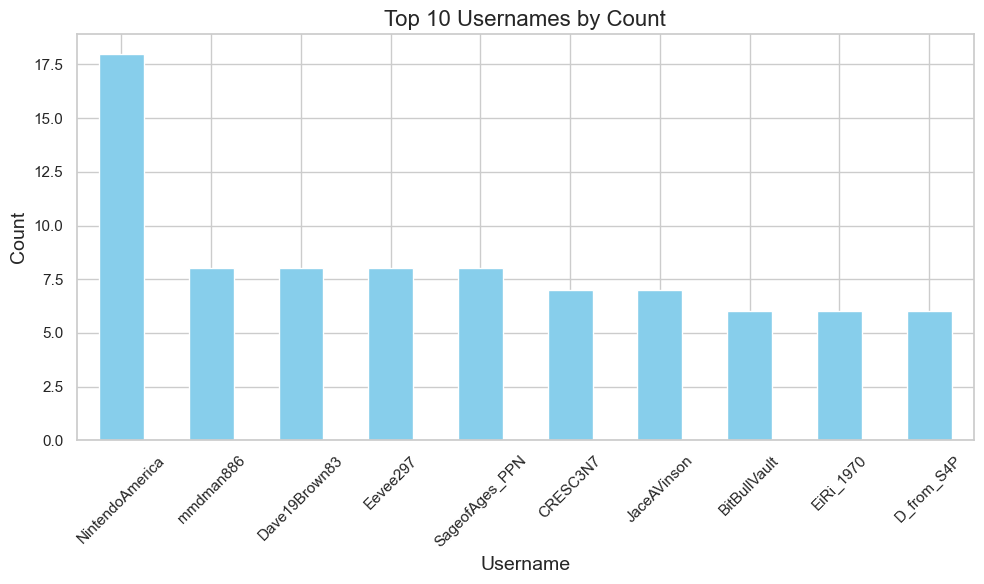

In [60]:
# Get the top 10 most frequent usernames
top_usernames = combined_df3['username'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_usernames.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usernames by Count', fontsize=16)
plt.xlabel('Username', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Define a function to calculate engagement metrics
def calculate_engagement_distribution(df, brand_name):
    engagement_metrics = ['replies', 'reposts', 'likes', 'bookmarks', 'views']
    engagement_distribution = df[engagement_metrics].sum()/len(df[df['is_main_tweet'] == True])
    engagement_distribution = engagement_distribution.rename(lambda x: x + '_mean')
    engagement_distribution['brand'] = brand_name
    return engagement_distribution

# Calculate engagement distributions for each brand
apple_engagement = calculate_engagement_distribution(combined_df, 'Apple')
samsung_engagement = calculate_engagement_distribution(combined_df2, 'Samsung')
nintendo_engagement = calculate_engagement_distribution(combined_df3, 'Nintendo')

# Combine results into a single DataFrame
engagement_df = pd.DataFrame([apple_engagement, samsung_engagement, nintendo_engagement])

# Display the engagement distributions
print(engagement_df)

   replies_mean  reposts_mean    likes_mean  bookmarks_mean    views_mean  \
0    608.392857    762.214286   9410.892857      531.607143  8.914340e+05   
1    142.727273    327.727273   1985.000000       69.909091  1.099464e+05   
2    791.944444   4626.833333  23428.000000     1380.333333  2.979241e+06   

      brand  
0     Apple  
1   Samsung  
2  Nintendo  


In [65]:
# Define a function to get top users by interaction type
def get_top_users_by_interaction(df, interaction_type, top_n=10):
    return df.groupby('username')[interaction_type].sum().sort_values(ascending=False).head(top_n)

# Get top users by each interaction type
top_users_replies = get_top_users_by_interaction(combined_df2, 'replies')
top_users_reposts = get_top_users_by_interaction(combined_df2, 'reposts')
top_users_likes = get_top_users_by_interaction(combined_df2, 'likes')
top_users_bookmarks = get_top_users_by_interaction(combined_df2, 'bookmarks')
top_users_views = get_top_users_by_interaction(combined_df2, 'views')

# Display the results
print("Top users by replies:\n", top_users_replies)
print("\nTop users by reposts:\n", top_users_reposts)
print("\nTop users by likes:\n", top_users_likes)
print("\nTop users by bookmarks:\n", top_users_bookmarks)
print("\nTop users by views:\n", top_users_views)

Top users by replies:
 username
SamsungMobile    354
SenDuckworth     321
MicrosoftEdge    176
AMAZlNGNATURE    172
XboxGamePass     145
nipunmarya        75
stufflistings     65
StyleListings     57
CeliaKayo         41
IGN               40
Name: replies, dtype: int64

Top users by reposts:
 username
SenDuckworth     1076
AMAZlNGNATURE     938
XboxGamePass      382
SamsungMobile     223
UNEP              191
stufflistings     175
IGN               152
MicrosoftEdge      92
StyleListings      86
nipunmarya         79
Name: reposts, dtype: int64

Top users by likes:
 username
AMAZlNGNATURE    7615
XboxGamePass     4106
SenDuckworth     3014
SamsungMobile    2081
MicrosoftEdge    1055
IGN              1002
stufflistings     482
Xbox              400
NOIweala          331
UNEP              310
Name: likes, dtype: int64

Top users by bookmarks:
 username
AMAZlNGNATURE    331
IGN              116
SamsungMobile     91
XboxGamePass      66
MicrosoftEdge     37
RomeInTheEast     27
SenDuckwort

In [66]:
from nltk.corpus import words
import nltk

# Download the words corpus if not already downloaded
nltk.download('words')

# Get the set of English words
english_words = set(words.words())

# Function to find non-English words in a text
def find_non_english_words(text):
    if pd.isnull(text):
        return []
    word_list = text.split()
    return [word for word in word_list if word.lower() not in english_words]

# Apply the function to each brand's dataset
apple_non_english_words = combined_df['text'].dropna().apply(find_non_english_words).explode().value_counts()
samsung_non_english_words = combined_df2['text'].dropna().apply(find_non_english_words).explode().value_counts()
nintendo_non_english_words = combined_df3['text'].dropna().apply(find_non_english_words).explode().value_counts()

# Display the results
print("Apple Non-English Words:\n", apple_non_english_words.head(10))
print("\nSamsung Non-English Words:\n", samsung_non_english_words.head(10))
print("\nNintendo Non-English Words:\n", nintendo_non_english_words.head(10))

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


Apple Non-English Words:
 text
iphone     529
ios        212
im         149
max        118
looks      111
years       85
lol         74
app         59
samsung     54
iphones     52
Name: count, dtype: int64

Samsung Non-English Words:
 text
samsung          111
ui                63
phones            19
updates           17
im                16
samsungmobile     16
years             14
april             11
galaxyai          11
oneui             10
Name: count, dtype: int64

Nintendo Non-English Words:
 text
nintendo        275
games           217
prices          186
im              135
mario           135
looks            99
droptheprice     84
kart             82
gonna            57
paid             53
Name: count, dtype: int64


### Post evolution caracteristic

In [ ]:
import pandas as pd
df = pd.read_csv('../data/processed/cleaned_tweet_data.csv')

In [5]:
df = df.sort_values(by=['tweet_id', 'date'])

In [6]:
df

,tweet_id,company,date,username,text,replies,reposts,likes,bookmarks,views,comment_count,total_engagement,main_sentiment,avg_comment_sentiment
6,1878804210986479685,samsung,2025-04-10,SamsungMobile,samsung leads sleep technology with expansion ...,33,74,559,16,63357,10,682,0.0,0.156278
14,1878804210986479685,samsung,2025-04-11,SamsungMobile,samsung leads sleep technology with expansion ...,33,74,559,16,63368,10,682,0.0,0.156278
22,1878804210986479685,samsung,2025-04-12,SamsungMobile,samsung leads sleep technology with expansion ...,33,75,561,16,63390,10,685,0.0,0.156278
30,1878804210986479685,samsung,2025-04-13,SamsungMobile,samsung leads sleep technology with expansion ...,33,75,561,16,63395,10,685,0.0,0.173642
38,1878804210986479685,samsung,2025-04-14,SamsungMobile,samsung leads sleep technology with expansion ...,33,75,560,16,63417,10,684,0.0,0.173642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1909687808060711266,apple,2025-04-14,theapplehub,president trump believes apple could manufactu...,371,219,2777,149,329714,223,3516,0.0,0.077130
193,1909687808060711266,apple,2025-04-15,theapplehub,president trump believes apple could manufactu...,370,220,2782,149,331930,386,3521,0.0,0.080990
213,1909687808060711266,apple,2025-04-16,theapplehub,president trump believes apple could manufactu...,370,218,2785,150,333589,375,3523,0.0,0.067975
233,1909687808060711266,apple,2025-04-17,theapplehub,president trump believes apple could manufactu...,370,219,2789,151,335032,301,3529,0.0,0.063355


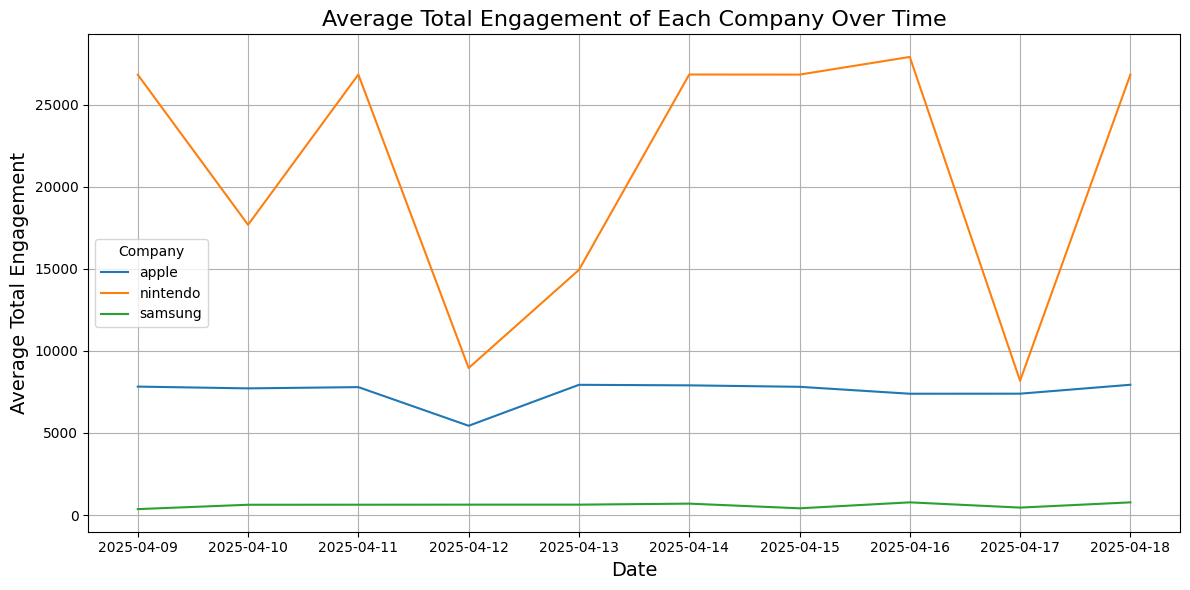

In [8]:
# Group by company and date, and calculate the mean of total_engagement
avg_engagement = df.groupby(['company', 'date'])['total_engagement'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
for company in avg_engagement['company'].unique():
    company_data = avg_engagement[avg_engagement['company'] == company]
    plt.plot(company_data['date'], company_data['total_engagement'], label=company)

plt.title('Average Total Engagement of Each Company Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Total Engagement', fontsize=14)
plt.legend(title='Company')
plt.grid(True)
plt.tight_layout()
plt.show()